# Final Project
Cameron Jones<br>
CS3315<br>
Original Data Set: https://www.kaggle.com/rtatman/chocolate-bar-ratings<br><br>
Questions:<br>
1)	Can I create a model to accurately predict the rating of a chocolate bar given the traits of the cacao bean?<br>
2)	Do different encodings of categorical values change the accuracy of machine learning models?<br>
3)	Do different granularities of the target variable change the accuracy of machine learning models?

### 1. Look at data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
# Load data
df = pd.read_csv('flavors_of_cacao.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company (Maker-if known)          1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   object 
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1794 non-null   object 
 8   Broad Bean Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [3]:
# Print head of data
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# Features:
<ul>
<li>Company (categorical)</li>
<li>Specific Bean Origin (geographical region) (categorical)</li>
<li>REF (a value linked to when the data was entered in the database. Higher = more recent) (discrete)</li>
<li>Review (year of publication of the review) (discrete)</li>
<li>Cocoa (percent of cocoa) (categorical) *change to discrete*</li>
<li>CompanyLocation (categorical)</li>
<li>Rating (target for classification) (discrete) **target**</li>
<li>BeanType (variety of bean) (categorical) (lots of NaNs)</li>
<li>Broad BeanOrigin (broader geographical region) (categorical)</li>
</ul>

In [4]:
# Check NaNs
df.isna().mean()

Company (Maker-if known)            0.000000
Specific Bean Origin or Bar Name    0.000000
REF                                 0.000000
Review Date                         0.000000
Cocoa Percent                       0.000000
Company Location                    0.000000
Rating                              0.000000
Bean Type                           0.000557
Broad Bean Origin                   0.000557
dtype: float64

In [5]:
df.isna().sum()

Company (Maker-if known)            0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64

In [6]:
df[df.isna().any(axis=1)]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [7]:
print('[' + df['Bean Type'][0] + ']')
(df == df['Bean Type'][0]).sum()

[ ]


C:\Users\fishg\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Company (Maker-if known)              0
Specific Bean Origin or Bar Name      0
REF                                   0
Review Date                           0
Cocoa Percent                         0
Company Location                      0
Rating                                0
Bean Type                           887
Broad Bean Origin                    73
dtype: int64

In [8]:
(df == df['Bean Type'][0]).mean()

Company (Maker-if known)            0.000000
Specific Bean Origin or Bar Name    0.000000
REF                                 0.000000
Review Date                         0.000000
Cocoa Percent                       0.000000
Company Location                    0.000000
Rating                              0.000000
Bean Type                           0.494150
Broad Bean Origin                   0.040669
dtype: float64

In [9]:
# Replace the two NaN values with the ' '
print(df['Bean Type'][1544])
print(df['Broad Bean Origin'][1072])

df['Bean Type'][1544] = df['Bean Type'][0]
df['Broad Bean Origin'][1072] = df['Bean Type'][0]

print(df[df.isna().any(axis=1)])

nan
nan
Empty DataFrame
Columns: [Company (Maker-if known), Specific Bean Origin or Bar Name, REF, Review Date, Cocoa Percent, Company Location, Rating, Bean Type, Broad Bean Origin]
Index: []


C:\Users\fishg\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\fishg\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# Change Cocoa Percent from string to float
df['CocoaPercent'] = df['Cocoa Percent'].str.strip('%').astype(float) / 100
df = df.drop(['Cocoa Percent'], axis=1)
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Company Location,Rating,Bean Type,Broad Bean Origin,CocoaPercent
0,A. Morin,Agua Grande,1876,2016,France,3.75,,Sao Tome,0.63
1,A. Morin,Kpime,1676,2015,France,2.75,,Togo,0.70
2,A. Morin,Atsane,1676,2015,France,3.00,,Togo,0.70
3,A. Morin,Akata,1680,2015,France,3.50,,Togo,0.70
4,A. Morin,Quilla,1704,2015,France,3.50,,Peru,0.70


In [11]:
# Sum Rating to see spread of values
dfgroup = df.groupby('Rating')
dfgroup['Rating'].count()

Rating
1.00      4
1.50     10
1.75      3
2.00     32
2.25     14
2.50    127
2.75    259
3.00    341
3.25    303
3.50    392
3.75    210
4.00     98
5.00      2
Name: Rating, dtype: int64

In [12]:
print('Avoid:')
print(df[df['Rating'] == 1])
print('\nTry out:')
print(df[df['Rating'] == 5])

Avoid:
     Company (Maker-if known) Specific Bean Origin or Bar Name  REF  \
326                 Callebaut                           Baking  141   
437           Claudio Corallo                         Principe  252   
465        Cote d' Or (Kraft)               Sensations Intense   48   
1175      Neuhaus (Callebaut)                             Dark  135   

      Review Date Company Location  Rating  Bean Type    Broad Bean Origin  \
326          2007          Belgium     1.0                         Ecuador   
437          2008         Sao Tome     1.0  Forastero  Sao Tome & Principe   
465          2006          Belgium     1.0                                   
1175         2007          Belgium     1.0                                   

      CocoaPercent  
326           0.70  
437           1.00  
465           0.70  
1175          0.73  

Try out:
   Company (Maker-if known) Specific Bean Origin or Bar Name  REF  \
78                   Amedei                            Chuao  

In [13]:
# Save original ratings for later tests
orig_rating = df['Rating']

# Truncate ratings so they are just 1 - 5
df['Rating'] = df['Rating'].apply(np.floor)

df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Company Location,Rating,Bean Type,Broad Bean Origin,CocoaPercent
0,A. Morin,Agua Grande,1876,2016,France,3.0,,Sao Tome,0.63
1,A. Morin,Kpime,1676,2015,France,2.0,,Togo,0.70
2,A. Morin,Atsane,1676,2015,France,3.0,,Togo,0.70
3,A. Morin,Akata,1680,2015,France,3.0,,Togo,0.70
4,A. Morin,Quilla,1704,2015,France,3.0,,Peru,0.70


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E07FEA59C8>,
      dtype=object)

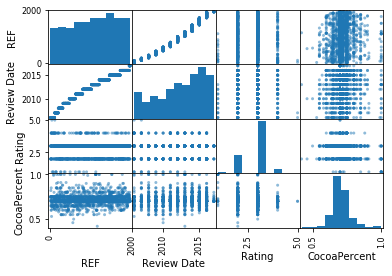

In [14]:
# Scatter plot matrix
pd.plotting.scatter_matrix(df)

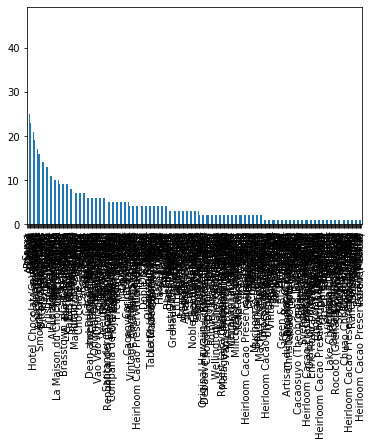

In [15]:
df['Company (Maker-if known)'].value_counts().plot(kind='bar')

In [16]:
# Number of unique values in the categorical features
print('Number of unique values')
print('Company (Maker-if known):', len(pd.unique(df['Company (Maker-if known)'])))
print('Specific Bean Origin or Bar Name:', len(pd.unique(df['Specific Bean Origin or Bar Name'])))
print('Company Location:', len(pd.unique(df['Company Location'])))
print('Bean Type:', len(pd.unique(df['Bean Type'])))
print('Broad Bean Origin:', len(pd.unique(df['Broad Bean Origin'])))

Number of unique values
Company (Maker-if known): 416
Specific Bean Origin or Bar Name: 1039
Company Location: 60
Bean Type: 41
Broad Bean Origin: 100


In [17]:
# Create arrays for the results of each test
results_t1 = []
results_t2 = []
results_t3 = []
results_t4 = []

## 2. Do tests
### One-hot encode ALL categorical features (Test 1)

In [18]:
# One-hot encode ALL categorical features
def oneHot(category, hot):
    if category == hot:
        return 1
    else:
        return 0

df_hot = df.copy()

#Company
for val in df_hot['Company (Maker-if known)'].unique():
    df_hot[val] = df_hot['Company (Maker-if known)'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Company (Maker-if known)'], axis=1)

# Specific Bean Origin
for val in df_hot['Specific Bean Origin or Bar Name'].unique():
    df_hot[val] = df_hot['Specific Bean Origin or Bar Name'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Specific Bean Origin or Bar Name'], axis=1)

# Company Location
for val in df_hot['Company Location'].unique():
    df_hot[val] = df_hot['Company Location'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Company Location'], axis=1)

# Bean Type
for val in df_hot['Bean Type'].unique():
    df_hot[val] = df_hot['Bean Type'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Bean Type'], axis=1)

# Broad Bean Origin
for val in df_hot['Broad Bean Origin'].unique():
    df_hot[val] = df_hot['Broad Bean Origin'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Broad Bean Origin'], axis=1)

df_hot.head()

,REF,Review Date,Rating,CocoaPercent,A. Morin,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),...,"Guat., D.R., Peru, Mad., PNG","Peru, Dom. Rep","Dom. Rep., Madagascar","Gre., PNG, Haw., Haiti, Mad","Mad., Java, PNG","Ven, Bolivia, D.R.","DR, Ecuador, Peru","Peru, Ecuador","Ecuador, Mad., PNG","Venezuela, Carribean"
0,1876,2016,3.0,0.63,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1676,2015,2.0,0.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1676,2015,3.0,0.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1680,2015,3.0,0.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1704,2015,3.0,0.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_hot.info()
print(df_hot.columns)
df_hot = df_hot.drop([' '], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Columns: 1579 entries, REF to Venezuela, Carribean
dtypes: float64(2), int64(1577)
memory usage: 21.6 MB
Index(['REF', 'Review Date', 'Rating', 'CocoaPercent', 'A. Morin', 'Acalli',
       'Adi', 'Aequare (Gianduja)', 'Ah Cacao', 'Akesson's (Pralus)',
       ...
       'Guat., D.R., Peru, Mad., PNG', 'Peru, Dom. Rep',
       'Dom. Rep., Madagascar', 'Gre., PNG, Haw., Haiti, Mad',
       'Mad., Java, PNG', 'Ven, Bolivia, D.R.', 'DR, Ecuador, Peru',
       'Peru, Ecuador', 'Ecuador, Mad., PNG', 'Venezuela, Carribean'],
      dtype='object', length=1579)


In [20]:
# Split train and test data
y = df_hot['Rating']
X = df_hot.drop(columns=['Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
# Decision tree for one hot
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train,y_train)

y_pred_hot_tree = tree_clf.predict(X_test)

results_t1.append(accuracy_score(y_test, y_pred_hot_tree))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_tree))

Accuracy: 0.6908077994428969


In [22]:
# kNN for one hot
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)

y_pred_hot_knn = knn_clf.predict(X_test)

results_t1.append(accuracy_score(y_test, y_pred_hot_knn))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_knn))

Accuracy: 0.6740947075208914


In [23]:
# Logistic regression for one hot
log_clf = LogisticRegression(random_state=0,max_iter=100,solver='liblinear')
log_clf.fit(X_train, y_train)

y_pred_hot_log = log_clf.predict(X_test)

results_t1.append(accuracy_score(y_test, y_pred_hot_log))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_log))

Accuracy: 0.7103064066852368


In [24]:
# SVM for one hot
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train, y_train)

y_pred_hot_svm = svm_clf.predict(X_test)

results_t1.append(accuracy_score(y_test, y_pred_hot_svm))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_svm))

Accuracy: 0.6935933147632312


In [25]:
# Random Forest for one hot
rnd_clf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=15,n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_hot_rnd = rnd_clf.predict(X_test)

results_t1.append(accuracy_score(y_test, y_pred_hot_rnd))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_rnd))

Accuracy: 0.7075208913649025


In [26]:
# Voting Classifier for one hot
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

y_pred_hot_vote = voting_clf.predict(X_test)

results_t1.append(accuracy_score(y_test, y_pred_hot_vote))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_vote))

Accuracy: 0.7047353760445683


### Ordinal encoding (Test 2)

In [27]:
#0   Company (Maker-if known)          1795 non-null   object 
# 1   Specific Bean Origin or Bar Name  1795 non-null   object 
# 2   REF                               1795 non-null   int64  
# 3   Review Date                       1795 non-null   int64  
# 4   Cocoa Percent                     1795 non-null   object 
# 5   Company Location                  1795 non-null   object 
# 6   Rating                            1795 non-null   float64
# 7   Bean Type                         1794 non-null   object 
# 8   Broad Bean Origin                 1794 non-null   object

# Ordinal encode all categorical values
df_ord = df.copy()
# Company
df_ord["Company_ord"] = df_ord["Company (Maker-if known)"].astype('category')
df_ord["Company_ord"] = df_ord["Company_ord"].cat.codes
df_ord = df_ord.drop(['Company (Maker-if known)'], axis=1)

# Specific Bean Origin
df_ord["Specific_Bean_Origin_or_Bar_Name_ord"] = df_ord["Specific Bean Origin or Bar Name"].astype('category')
df_ord["Specific_Bean_Origin_or_Bar_Name_ord"] = df_ord["Specific_Bean_Origin_or_Bar_Name_ord"].cat.codes
df_ord = df_ord.drop(['Specific Bean Origin or Bar Name'], axis=1)

# Company Location
df_ord["Company_Location_ord"] = df_ord["Company Location"].astype('category')
df_ord["Company_Location_ord"] = df_ord["Company_Location_ord"].cat.codes
df_ord = df_ord.drop(['Company Location'], axis=1)

# Bean Type
df_ord["Bean_Type_ord"] = df_ord["Bean Type"].astype('category')
df_ord["Bean_Type_ord"] = df_ord["Bean_Type_ord"].cat.codes
df_ord = df_ord.drop(['Bean Type'], axis=1)

# Broad Bean Origin
df_ord["Broad_Bean_Origin_ord"] = df_ord["Broad Bean Origin"].astype('category')
df_ord["Broad_Bean_Origin_ord"] = df_ord["Broad_Bean_Origin_ord"].cat.codes
df_ord = df_ord.drop(['Broad Bean Origin'], axis=1)

df_ord.head()

,REF,Review Date,Rating,CocoaPercent,Company_ord,Specific_Bean_Origin_or_Bar_Name_ord,Company_Location_ord,Bean_Type_ord,Broad_Bean_Origin_ord
0,1876,2016,3.0,0.63,0,14,18,40,67
1,1676,2015,2.0,0.70,0,492,18,40,77
2,1676,2015,3.0,0.70,0,67,18,40,77
3,1680,2015,3.0,0.70,0,15,18,40,77
4,1704,2015,3.0,0.70,0,809,18,40,55


In [28]:
# Split train and test data
#from sklearn.model_selection import train_test_split
y = df_ord['Rating']
X = df_ord.drop(columns=['Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
# Decision tree for ordinal
tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X_train,y_train)

y_pred_ord_tree = tree_clf.predict(X_test)

results_t2.append(accuracy_score(y_test, y_pred_ord_tree))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_tree))

Accuracy: 0.7075208913649025


In [30]:
# kNN for ordinal
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)

y_pred_ord_knn = knn_clf.predict(X_test)

results_t2.append(accuracy_score(y_test, y_pred_ord_knn))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_knn))

Accuracy: 0.6545961002785515


In [31]:
# Logistical regression for ordinal
log_clf = LogisticRegression(random_state=0,max_iter=50,solver='liblinear')
log_clf.fit(X_train, y_train)

y_pred_ord_log = log_clf.predict(X_test)

results_t2.append(accuracy_score(y_test, y_pred_ord_log))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_log))

Accuracy: 0.7075208913649025


In [32]:
# SVM for ordinal
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train, y_train)

y_pred_ord_svm = svm_clf.predict(X_test)

results_t2.append(accuracy_score(y_test, y_pred_ord_svm))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_svm))

Accuracy: 0.7075208913649025


In [33]:
# Random Forest for ordinal
rnd_clf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=2,n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_ord_rnd = rnd_clf.predict(X_test)

results_t2.append(accuracy_score(y_test, y_pred_ord_rnd))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_rnd))

Accuracy: 0.7075208913649025


In [34]:
# Voting Classifier for ordinal
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

y_pred_ord_vote = voting_clf.predict(X_test)

results_t2.append(accuracy_score(y_test, y_pred_ord_vote))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_vote))

Accuracy: 0.7075208913649025


### Change Rating

In [35]:
# Map Rating from 0, 0.25, 0.5,..., 5.5, 5.75 to 1-20
df['Rating'] = orig_rating

mapping = {1.0 : 1, 1.25 : 2, 1.5 : 3, 1.75 : 4, 2.0 : 5, 2.25 : 6, 2.5 : 7, 2.75 : 8, 3.0 : 9, 3.25 : 10, 3.5 : 11,
          3.75 : 12, 4.0 : 13, 4.25 : 14, 4.5 : 15, 4.75 : 16, 5.0 : 17, 5.25 : 18, 5.5 : 19, 5.75 : 20}
df['Rating'] = [mapping[x] for x in df['Rating']] #.applymap(lambda x : mapping[x])
df['Rating']

0       9
1       5
2       9
3       9
4       9
       ..
1790    9
1791    9
1792    9
1793    9
1794    9
Name: Rating, Length: 1795, dtype: int64

#### Expectations:
Because this creates many more categories for the models to classify, I expect that the accuracy for tests 3 and 4 to be, in general, lower than that of tests 1 and 2.

### One Hot with mapped Rating (Test 3)

In [36]:
# One-hot encode ALL categorical features
def oneHot(category, hot):
    if category == hot:
        return 1
    else:
        return 0

df_hot = df.copy()

#Company
for val in df_hot['Company (Maker-if known)'].unique():
    df_hot[val] = df_hot['Company (Maker-if known)'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Company (Maker-if known)'], axis=1)

# Specific Bean Origin
for val in df_hot['Specific Bean Origin or Bar Name'].unique():
    df_hot[val] = df_hot['Specific Bean Origin or Bar Name'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Specific Bean Origin or Bar Name'], axis=1)

# Company Location
for val in df_hot['Company Location'].unique():
    df_hot[val] = df_hot['Company Location'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Company Location'], axis=1)

# Bean Type
for val in df_hot['Bean Type'].unique():
    df_hot[val] = df_hot['Bean Type'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Bean Type'], axis=1)

# Broad Bean Origin
for val in df_hot['Broad Bean Origin'].unique():
    df_hot[val] = df_hot['Broad Bean Origin'].apply(oneHot, hot=val)
df_hot = df_hot.drop(['Broad Bean Origin'], axis=1)

df_hot.head()

,REF,Review Date,Rating,CocoaPercent,A. Morin,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),...,"Guat., D.R., Peru, Mad., PNG","Peru, Dom. Rep","Dom. Rep., Madagascar","Gre., PNG, Haw., Haiti, Mad","Mad., Java, PNG","Ven, Bolivia, D.R.","DR, Ecuador, Peru","Peru, Ecuador","Ecuador, Mad., PNG","Venezuela, Carribean"
0,1876,2016,9,0.63,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1676,2015,5,0.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1676,2015,9,0.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1680,2015,9,0.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1704,2015,9,0.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_hot.info()
print(df_hot.columns)
df_hot = df_hot.drop([' '], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Columns: 1579 entries, REF to Venezuela, Carribean
dtypes: float64(1), int64(1578)
memory usage: 21.6 MB
Index(['REF', 'Review Date', 'Rating', 'CocoaPercent', 'A. Morin', 'Acalli',
       'Adi', 'Aequare (Gianduja)', 'Ah Cacao', 'Akesson's (Pralus)',
       ...
       'Guat., D.R., Peru, Mad., PNG', 'Peru, Dom. Rep',
       'Dom. Rep., Madagascar', 'Gre., PNG, Haw., Haiti, Mad',
       'Mad., Java, PNG', 'Ven, Bolivia, D.R.', 'DR, Ecuador, Peru',
       'Peru, Ecuador', 'Ecuador, Mad., PNG', 'Venezuela, Carribean'],
      dtype='object', length=1579)


In [38]:
# Split train and test data
y = df_hot['Rating']
X = df_hot.drop(columns=['Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
# Decision tree for one hot
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train,y_train)

y_pred_hot_tree = tree_clf.predict(X_test)

results_t3.append(accuracy_score(y_test, y_pred_hot_tree))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_tree))

Accuracy: 0.6908077994428969


In [40]:
# kNN for one hot
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)

y_pred_hot_knn = knn_clf.predict(X_test)

results_t3.append(accuracy_score(y_test, y_pred_hot_knn))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_knn))

Accuracy: 0.6740947075208914


In [41]:
# Logistic regression for one hot
log_clf = LogisticRegression(random_state=0,max_iter=100,solver='liblinear')
log_clf.fit(X_train, y_train)

y_pred_hot_log = log_clf.predict(X_test)

results_t3.append(accuracy_score(y_test, y_pred_hot_log))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_log))

Accuracy: 0.7103064066852368


In [42]:
# SVM for one hot
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train, y_train)

y_pred_hot_svm = svm_clf.predict(X_test)

results_t3.append(accuracy_score(y_test, y_pred_hot_svm))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_svm))

Accuracy: 0.6935933147632312


In [43]:
# Random Forest for one hot
rnd_clf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=15,n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_hot_rnd = rnd_clf.predict(X_test)

results_t3.append(accuracy_score(y_test, y_pred_hot_rnd))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_rnd))

Accuracy: 0.7075208913649025


In [44]:
# Voting Classifier for one hot
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

y_pred_hot_vote = voting_clf.predict(X_test)

results_t3.append(accuracy_score(y_test, y_pred_hot_vote))
print('Accuracy:', accuracy_score(y_test, y_pred_hot_vote))

Accuracy: 0.7047353760445683


### Ordinal Encoding with mapped Rating (Test 4)

In [45]:
#0   Company (Maker-if known)          1795 non-null   object 
# 1   Specific Bean Origin or Bar Name  1795 non-null   object 
# 2   REF                               1795 non-null   int64  
# 3   Review Date                       1795 non-null   int64  
# 4   Cocoa Percent                     1795 non-null   object 
# 5   Company Location                  1795 non-null   object 
# 6   Rating                            1795 non-null   float64
# 7   Bean Type                         1794 non-null   object 
# 8   Broad Bean Origin                 1794 non-null   object

# Ordinal encode all categorical values
df_ord = df.copy()
# Company
df_ord["Company_ord"] = df_ord["Company (Maker-if known)"].astype('category')
df_ord["Company_ord"] = df_ord["Company_ord"].cat.codes
df_ord = df_ord.drop(['Company (Maker-if known)'], axis=1)

# Specific Bean Origin
df_ord["Specific_Bean_Origin_or_Bar_Name_ord"] = df_ord["Specific Bean Origin or Bar Name"].astype('category')
df_ord["Specific_Bean_Origin_or_Bar_Name_ord"] = df_ord["Specific_Bean_Origin_or_Bar_Name_ord"].cat.codes
df_ord = df_ord.drop(['Specific Bean Origin or Bar Name'], axis=1)

# Company Location
df_ord["Company_Location_ord"] = df_ord["Company Location"].astype('category')
df_ord["Company_Location_ord"] = df_ord["Company_Location_ord"].cat.codes
df_ord = df_ord.drop(['Company Location'], axis=1)

# Bean Type
df_ord["Bean_Type_ord"] = df_ord["Bean Type"].astype('category')
df_ord["Bean_Type_ord"] = df_ord["Bean_Type_ord"].cat.codes
df_ord = df_ord.drop(['Bean Type'], axis=1)

# Broad Bean Origin
df_ord["Broad_Bean_Origin_ord"] = df_ord["Broad Bean Origin"].astype('category')
df_ord["Broad_Bean_Origin_ord"] = df_ord["Broad_Bean_Origin_ord"].cat.codes
df_ord = df_ord.drop(['Broad Bean Origin'], axis=1)

df_ord.head()

,REF,Review Date,Rating,CocoaPercent,Company_ord,Specific_Bean_Origin_or_Bar_Name_ord,Company_Location_ord,Bean_Type_ord,Broad_Bean_Origin_ord
0,1876,2016,9,0.63,0,14,18,40,67
1,1676,2015,5,0.70,0,492,18,40,77
2,1676,2015,9,0.70,0,67,18,40,77
3,1680,2015,9,0.70,0,15,18,40,77
4,1704,2015,9,0.70,0,809,18,40,55


In [46]:
# Split train and test data
#from sklearn.model_selection import train_test_split
y = df_ord['Rating']
X = df_ord.drop(columns=['Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
# Decision tree for ordinal
tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X_train,y_train)

y_pred_ord_tree = tree_clf.predict(X_test)

results_t4.append(accuracy_score(y_test, y_pred_ord_tree))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_tree))

Accuracy: 0.7075208913649025


In [48]:
# kNN for ordinal
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)

y_pred_ord_knn = knn_clf.predict(X_test)

results_t4.append(accuracy_score(y_test, y_pred_ord_knn))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_knn))

Accuracy: 0.6545961002785515


In [49]:
# Logistical regression for ordinal
log_clf = LogisticRegression(random_state=0,max_iter=50,solver='liblinear')
log_clf.fit(X_train, y_train)

y_pred_ord_log = log_clf.predict(X_test)

results_t4.append(accuracy_score(y_test, y_pred_ord_log))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_log))

Accuracy: 0.7075208913649025


In [50]:
# SVM for ordinal
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(X_train, y_train)

y_pred_ord_svm = svm_clf.predict(X_test)

results_t4.append(accuracy_score(y_test, y_pred_ord_svm))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_svm))

Accuracy: 0.7075208913649025


In [51]:
# Random Forest for ordinal
rnd_clf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=2,n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_ord_rnd = rnd_clf.predict(X_test)

results_t4.append(accuracy_score(y_test, y_pred_ord_rnd))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_rnd))

Accuracy: 0.7075208913649025


In [52]:
# Voting Classifier for ordinal
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

y_pred_ord_vote = voting_clf.predict(X_test)

results_t4.append(accuracy_score(y_test, y_pred_ord_vote))
print('Accuracy:', accuracy_score(y_test, y_pred_ord_vote))

Accuracy: 0.7075208913649025


## 3. Results

In [53]:
# Results in a table

# Adjust results to make a dataframe
d_tree_res = [results_t1[0], results_t2[0], results_t3[0], results_t4[0]]
knn_res = [results_t1[1], results_t2[1], results_t3[1], results_t4[1]]
log_reg_res = [results_t1[2], results_t2[2], results_t3[2], results_t4[2]]
svm_res = [results_t1[3], results_t2[3], results_t3[3], results_t4[3]]
rand_for_res = [results_t1[4], results_t2[4], results_t3[4], results_t4[4]]
vote_res = [results_t1[5], results_t2[5], results_t3[5], results_t4[5]]

res_df = pd.DataFrame({'Decision Tree':d_tree_res, 'kNN':knn_res, 'Log. Regression':log_reg_res, 'SVM':svm_res,
                      'Rand. Forest':rand_for_res, 'Voting':vote_res})
res_df.set_index = ['Test 1', 'Test 2', 'Test 3', 'Test 4']
res_df

,Decision Tree,kNN,Log. Regression,SVM,Rand. Forest,Voting
0,0.690808,0.674095,0.710306,0.693593,0.707521,0.704735
1,0.707521,0.654596,0.707521,0.707521,0.707521,0.707521
2,0.690808,0.674095,0.710306,0.693593,0.707521,0.704735
3,0.707521,0.654596,0.707521,0.707521,0.707521,0.707521


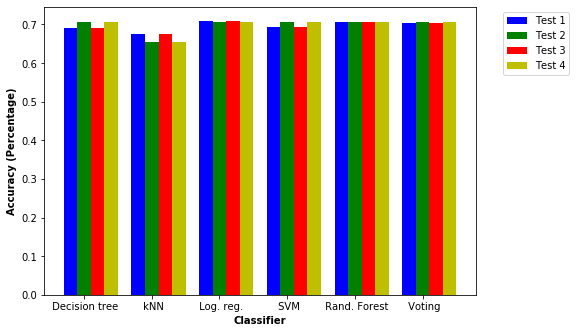

In [54]:
# Plot results in a bar plot
data = [results_t1, results_t2, results_t3, results_t4]
X = np.arange(len(results_t1))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rect1 = ax.bar(X + 0.00, data[0], color = 'b', width = 0.2, label='Test 1')
rect2 = ax.bar(X + 0.20, data[1], color = 'g', width = 0.2, label='Test 2')
rect3 = ax.bar(X + 0.40, data[2], color = 'r', width = 0.2, label='Test 3')
rect4 = ax.bar(X + 0.60, data[3], color = 'y', width = 0.2, label='Test 4')

plt.xlabel('Classifier', fontweight='bold')
plt.xticks([r + 0.2 for r in range(len(results_t1))], [' Decision tree', ' kNN', ' Log. reg.', ' SVM',
                                                       ' Rand. Forest', ' Voting'])
plt.ylabel('Accuracy (Percentage)', fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()